In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
pd.options.mode.chained_assignment = None

# Understanding the dataset

In [2]:
df = pd.read_csv('CONSOLE_DIGITAL_MARKETING_APP_DATE_APPLE.csv', parse_dates=['DATE'], dayfirst=True)
df.head()

,DATE,C_COMPILER,C_TUTORIAL,CSHARP_COMPILER,CSHARP_TUTORIAL,CPLUSPLUS_COMPILER,CPLUSPLUS_TUTORIAL,CALCULATORPLUS,CALENDARPLUS,COMPILERPLUS,...,PYTHON_TUTORIAL,RUBY_COMPILER,RUBY_TUTORIAL,SUCCESS_STORIES,SWIFT_COMPILER,SWIFT_TUTORIAL,TASKSPLUS,TIMEPLUS,TRAVEL_DIARIES,XML_TUTORIAL
0,2021-03-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-03-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-03-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-03-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-03-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Converting DATE to index

In [3]:
df = df.iloc[:,0:2]
df.set_index("DATE",inplace=True)
df.head()

,C_COMPILER
DATE,
2021-03-08,0
2021-03-09,0
2021-03-10,0
2021-03-11,0
2021-03-13,0


## Plotting the daily View Count for the app 

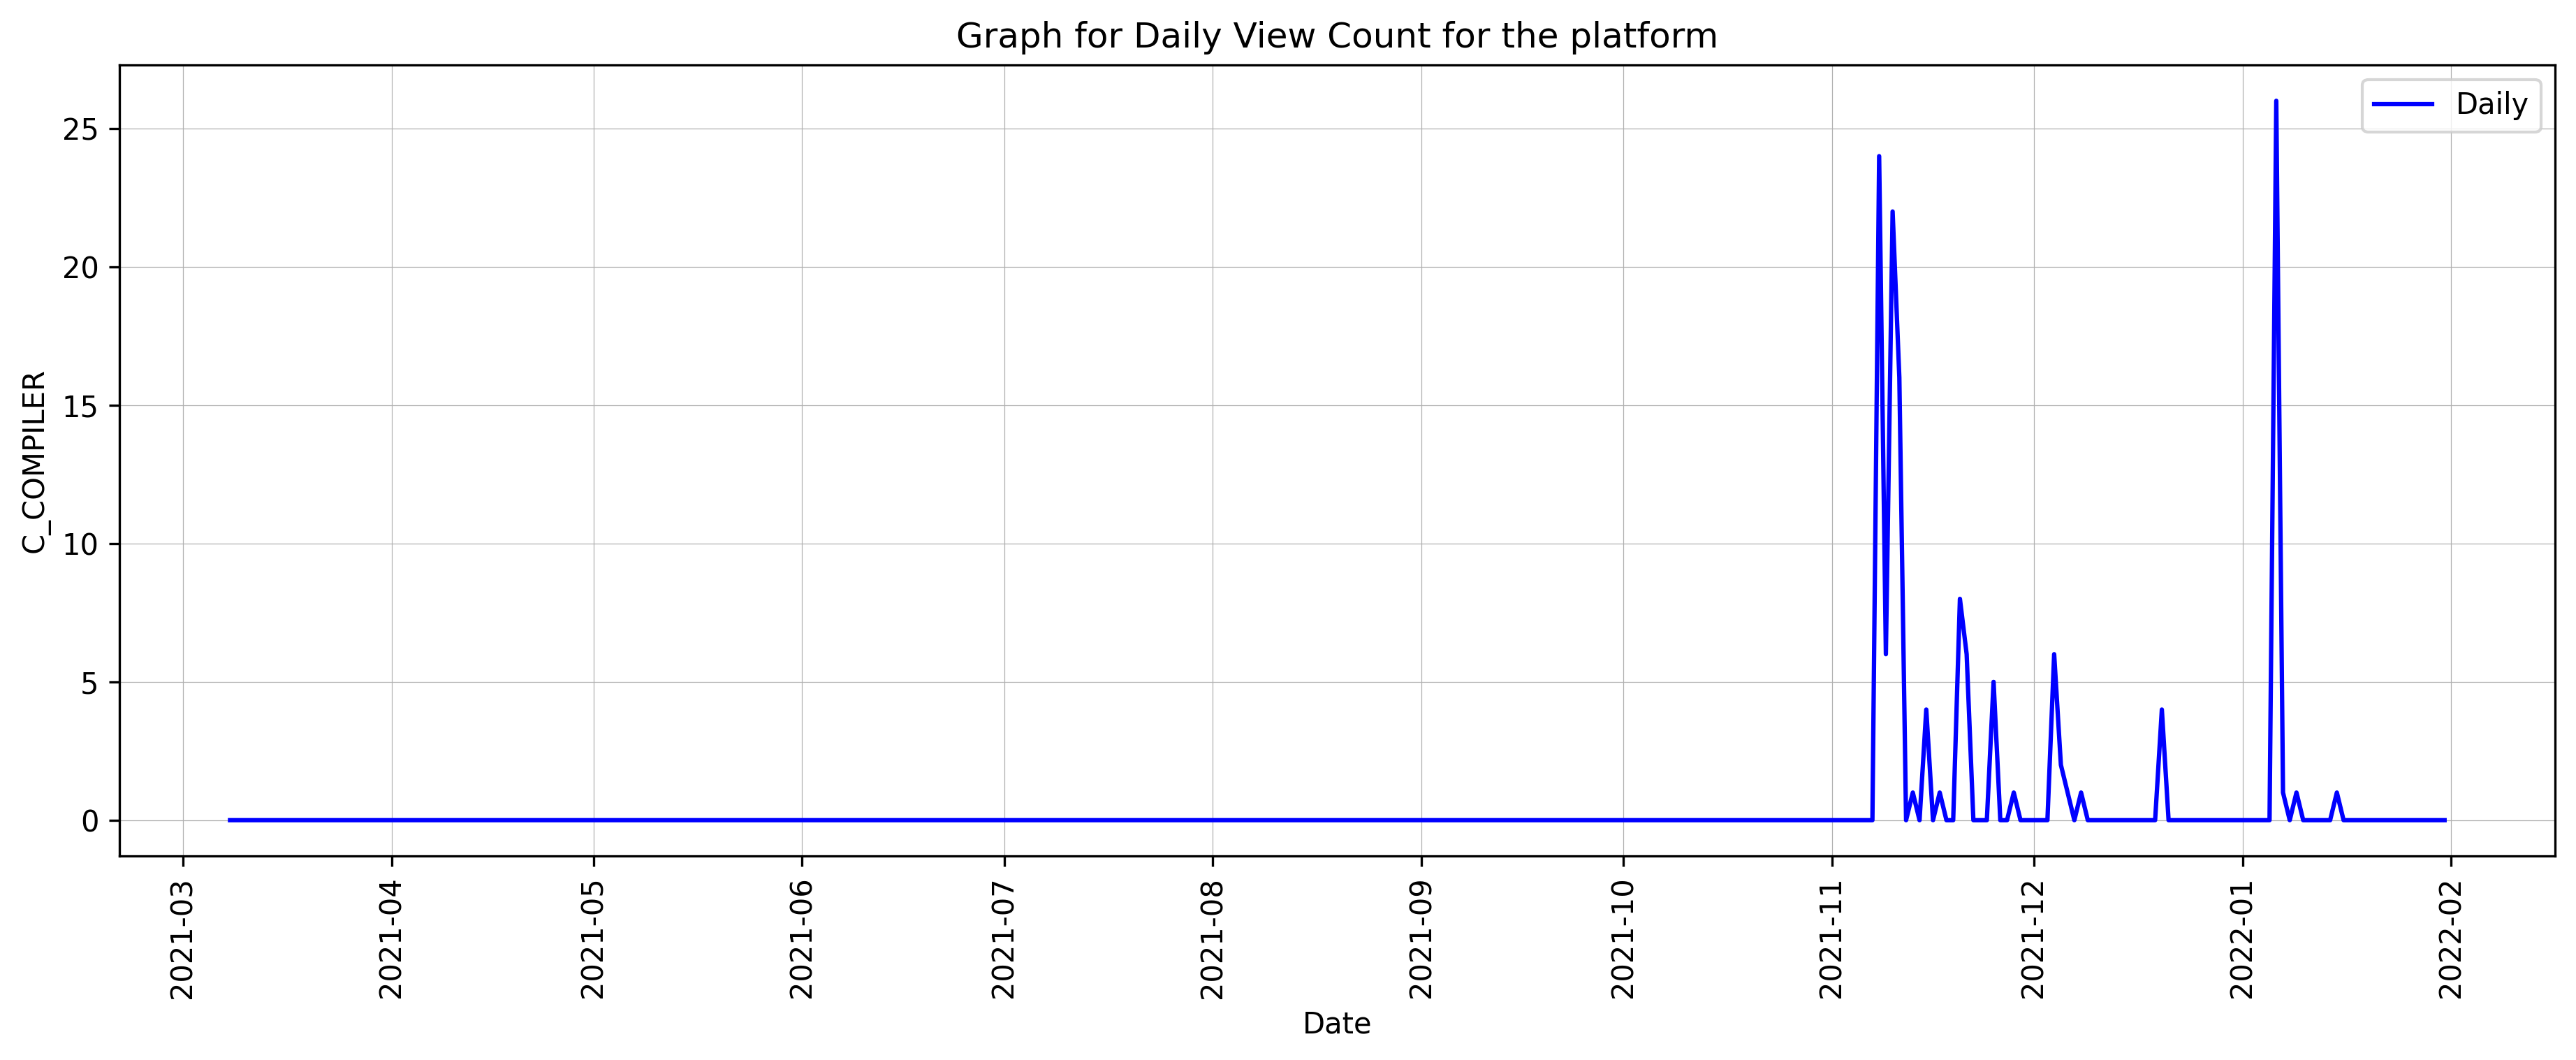

In [4]:
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df, x='DATE', y='C_COMPILER', label ='Daily', color='Blue')
plt.xlabel('Date')
plt.ylabel('C_COMPILER')
plt.title('Graph for Daily View Count for the platform')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Converting daily View Count to weekly View Count 

In [5]:
import datetime as dt
df = df.resample('w').mean()
df['DATE'] = df.index
df['DATE'] = df['DATE'].map(dt.datetime.toordinal)
df.head()

,C_COMPILER,DATE
DATE,,
2021-03-14,0.0,737863
2021-03-21,0.0,737870
2021-03-28,0.0,737877
2021-04-04,0.0,737884
2021-04-11,0.0,737891


## Plotting the weekly View Count for the app 

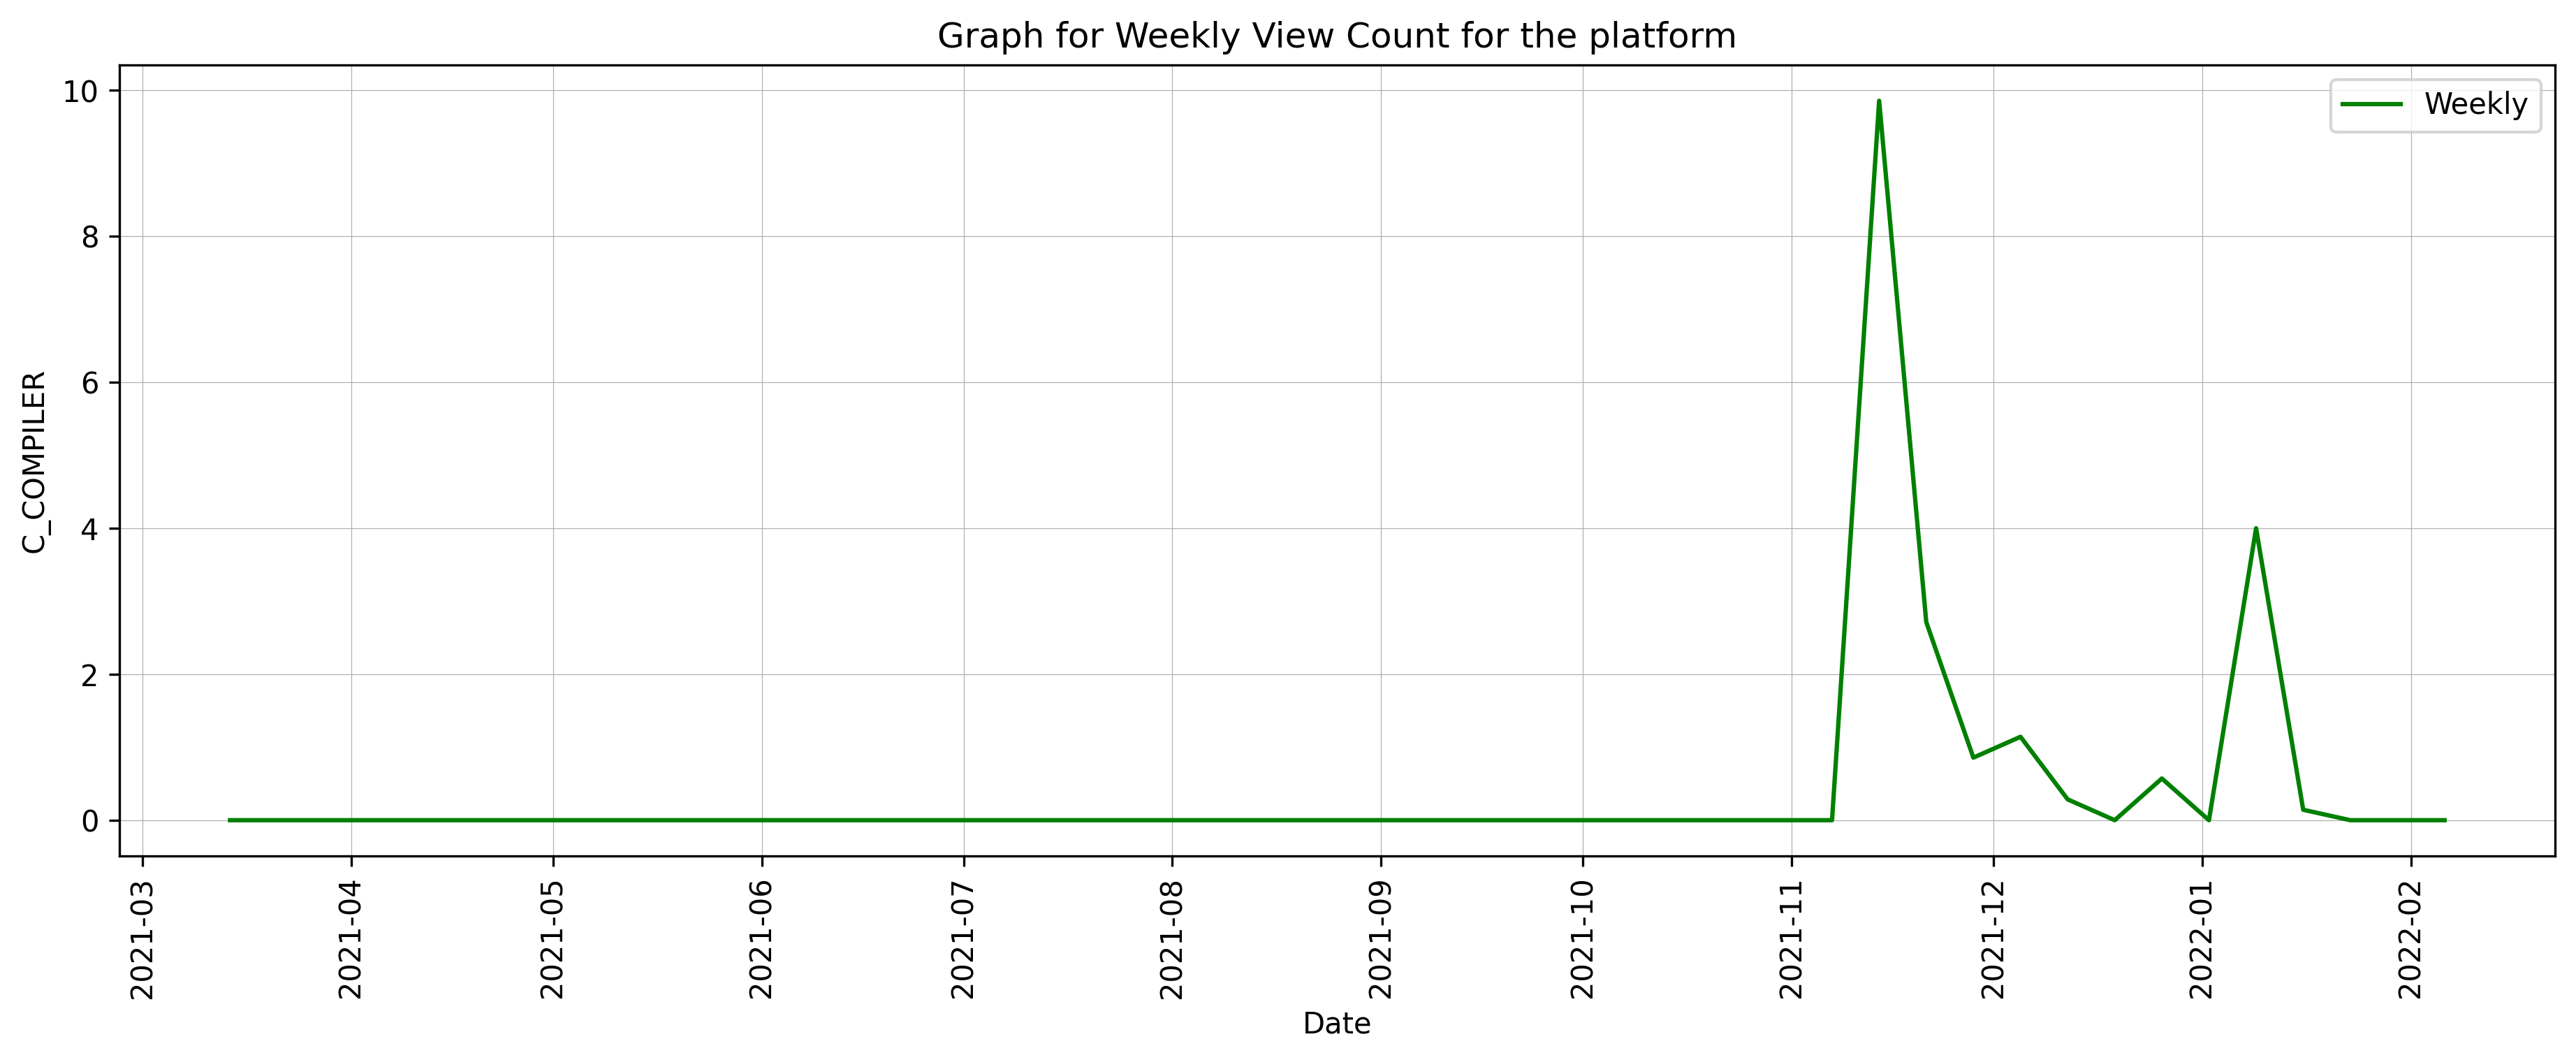

In [6]:
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df, x=df.index, y='C_COMPILER', label ='Weekly', color='Green')
plt.xlabel('Date')
plt.ylabel('C_COMPILER')
plt.title('Graph for Weekly View Count for the platform')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### Splitting data into train and test

In [7]:
test_df = df.tail(20)
train_df = df
X_train, y_train = train_df[['DATE']], train_df[['C_COMPILER']]
X_test, y_test = test_df[['DATE']], test_df[['C_COMPILER']]

### Using xgboost model for Time Series Forecasting

In [8]:
reg = XGBRegressor(n_estimators=200, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:0.75922	validation_1-mae:1.12894
[1]	validation_0-mae:0.75361	validation_1-mae:1.12221
[2]	validation_0-mae:0.74805	validation_1-mae:1.11553
[3]	validation_0-mae:0.74253	validation_1-mae:1.10889
[4]	validation_0-mae:0.73705	validation_1-mae:1.10230
[5]	validation_0-mae:0.73162	validation_1-mae:1.09574
[6]	validation_0-mae:0.72624	validation_1-mae:1.08924
[7]	validation_0-mae:0.72089	validation_1-mae:1.08277
[8]	validation_0-mae:0.71560	validation_1-mae:1.07635
[9]	validation_0-mae:0.71034	validation_1-mae:1.06998
[10]	validation_0-mae:0.70513	validation_1-mae:1.06364
[11]	validation_0-mae:0.69996	validation_1-mae:1.05735
[12]	validation_0-mae:0.69484	validation_1-mae:1.05110
[13]	validation_0-mae:0.68975	validation_1-mae:1.04489
[14]	validation_0-mae:0.68471	validation_1-mae:1.03872
[15]	validation_0-mae:0.67971	validation_1-mae:1.03259
[16]	validation_0-mae:0.67475	validation_1-mae:1.02651
[17]	validation_0-mae:0.66982	validation_1-mae:1.02046
[18]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Predicting Data

In [9]:
validations = reg.predict(X_test)
test_df['validations'] = validations

### Plotting the original data against the predicted data

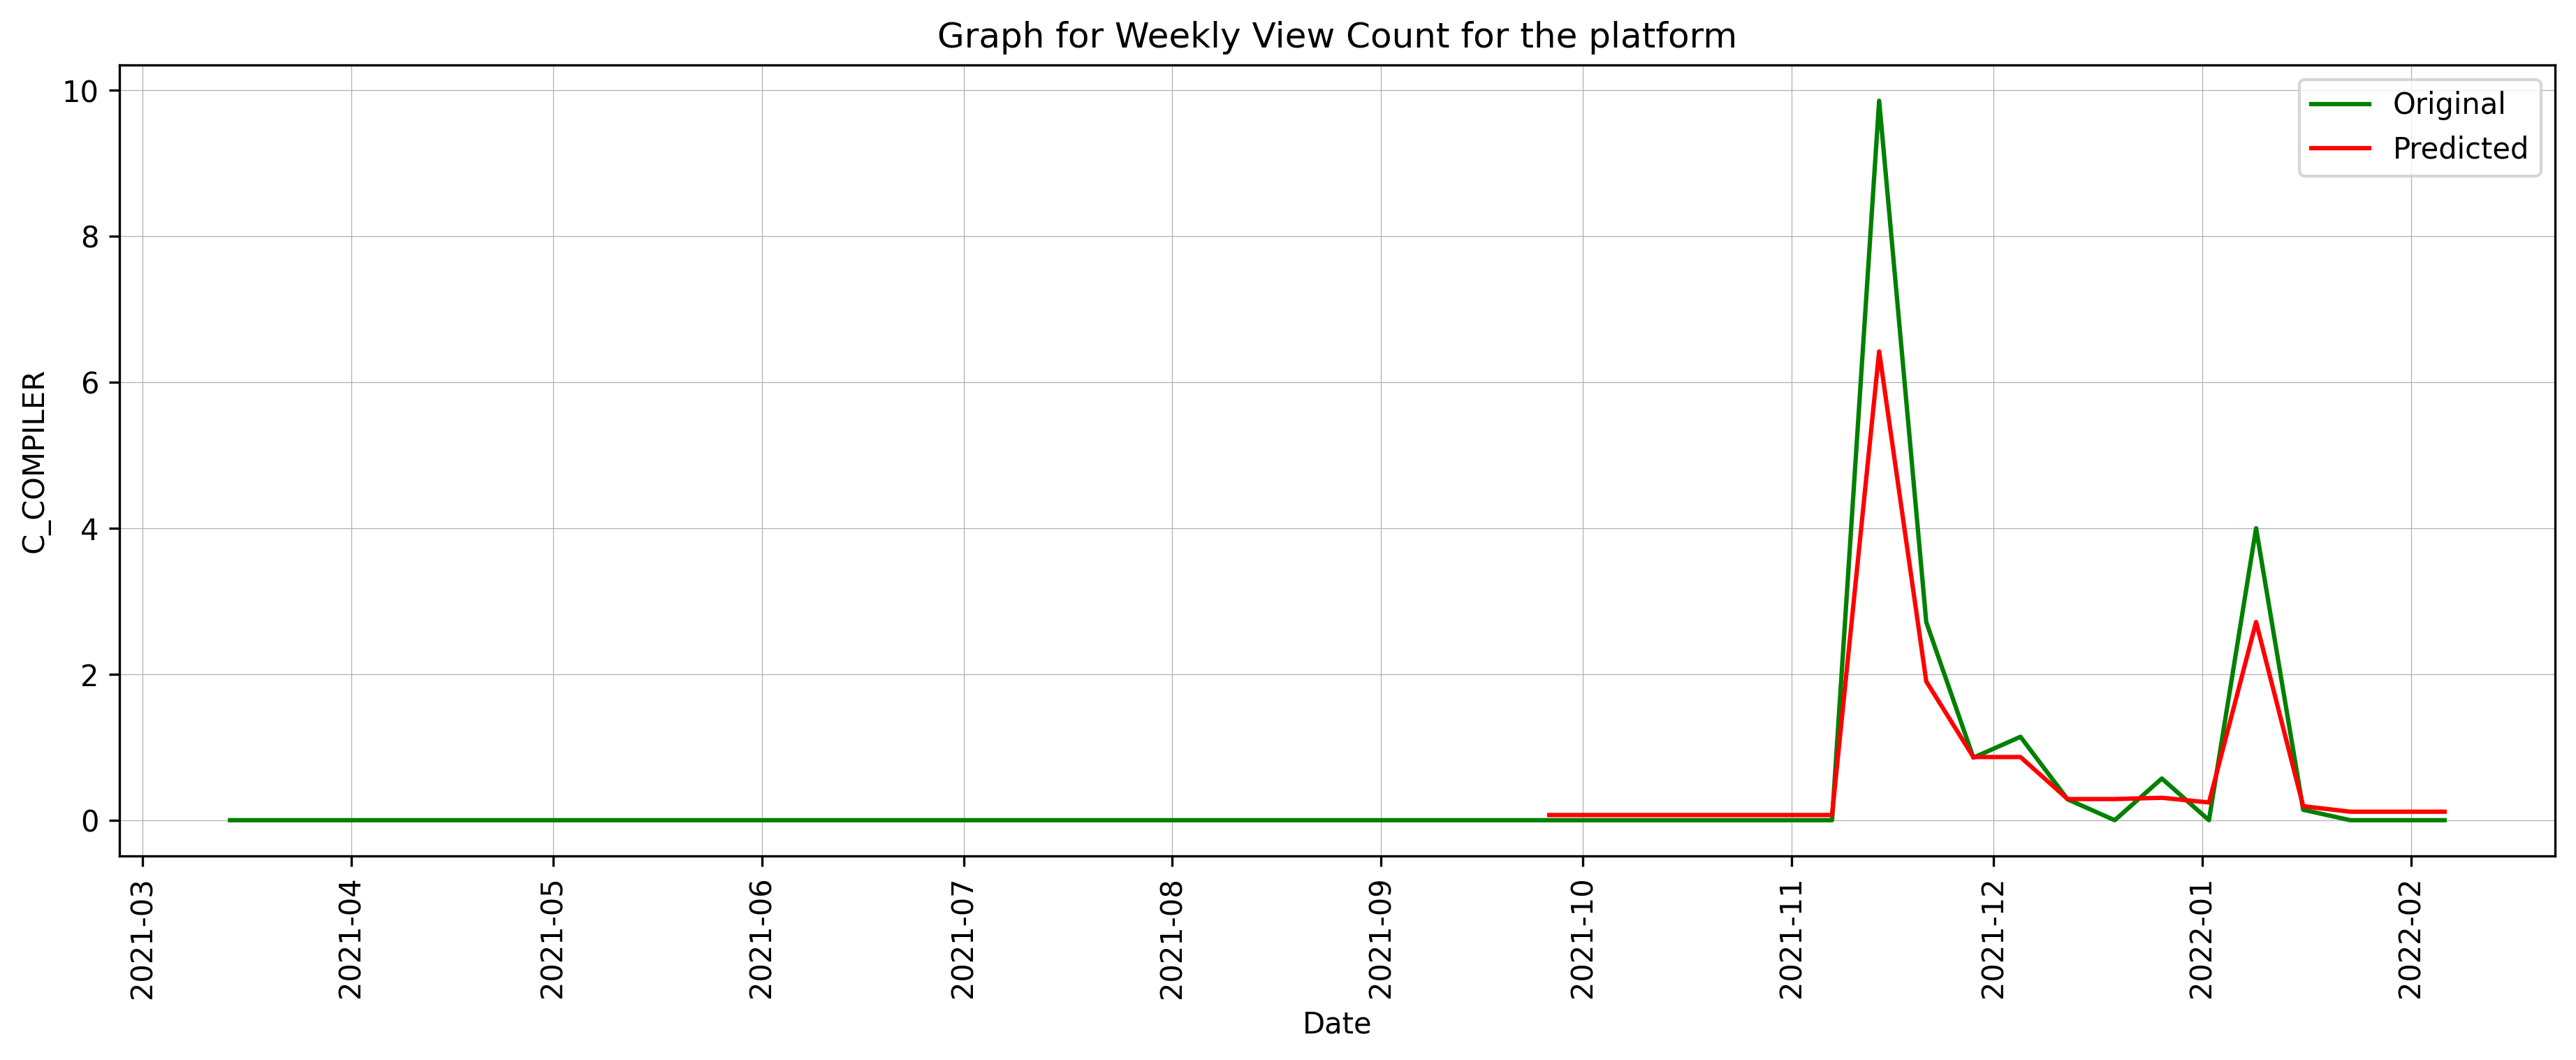

In [10]:
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=train_df, x=train_df.index, y='C_COMPILER', label ='Original', color='Green')
sns.lineplot(data=test_df, x=test_df.index, y='validations', label ='Predicted', color='Red')
plt.grid(linestyle='-', linewidth=0.3)
plt.xlabel('Date')
plt.ylabel('C_COMPILER')
plt.title('Graph for Weekly View Count for the platform')
plt.legend()
ax.tick_params(axis='x', rotation=90)